In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
class FourierBasis1D:
    def __init__(self, h):
        self.h = h #Number of basis functions (should equal n_el p + 1, where n_el is the number of elements)
        self.indices = np.linspace(-(self.h-1)/2, (self.h-1)/2, self.h)
        # self.indices = [0, 1, -1, 2, -2]
        self.L = 1
        
    def basis_function(self, n, x):
        return np.exp(2*n*1j*np.pi*x/self.L)
    
    def forward(self, x):
        basis_values = np.zeros((x.shape[0],self.h))
        for n in range(self.h):
            basis_values[:, n] = self.basis_function(self.indices[n], x)
        return basis_values
    
    def basis_gradient(self, n, x):
        return 2*self.indices[n]*1j*np.pi/self.L*self.basis_function(self.indices[n], x)
    
    def grad(self, x):
        basis_gradients = np.zeros((x.shape[0],self.h))
        for n in range(self.h):
            basis_grad = self.basis_gradient(n, x)
            basis_gradients[:, n] = basis_grad
        return basis_gradients

    def plot_1d_basis(self):
        resolution = 1000
        x_values = np.linspace(0, 1, resolution)  # Adjusted range for x_values
        basis_matrix = self.forward(x_values)
        plt.figure(figsize=(8, 6))
        for i in range(self.h):
            plt.plot(x_values, basis_matrix[:,i], label=f'Basis {i}')
        plt.title(f'1D Basis Functions')
        plt.xlabel('x')
        plt.ylabel('Basis Values')
        plt.legend()
        plt.grid(True)
        # plt.savefig("BSpline1D.svg", bbox_inches='tight', transparent=True)
        plt.show()
        
    def plot_1d_basis_gradients(self):
        resolution = 1000
        x_values = np.linspace(0, 1, resolution)  # Use full knot span for x_values
        basis_gradients_matrix = self.grad(x_values)
        plt.figure(figsize=(8, 6))
        for i in range(self.h):
            plt.plot(x_values, basis_gradients_matrix[:, i], label=f'Gradient {i}')
        plt.title(f'Gradients of 1D B-spline Basis Functions')
        plt.xlabel('x')
        plt.ylabel('Gradient Values')
        plt.legend()
        plt.grid(True)
        # plt.savefig("BSplinegrad1D.svg", bbox_inches='tight', transparent=True)
        plt.show()

In [122]:
basis = FourierBasis1D(h=5)

In [123]:
x = np.linspace(0,1,1000)
basis.forward(x)

/tmp/ipykernel_3870939/99359807.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  basis_values[:, n] = self.basis_function(self.indices[n], x)


array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99992089, 0.99998022, 1.        , 0.99998022, 0.99992089],
       [0.99968356, 0.99992089, 1.        , 0.99992089, 0.99968356],
       ...,
       [0.99968356, 0.99992089, 1.        , 0.99992089, 0.99968356],
       [0.99992089, 0.99998022, 1.        , 0.99998022, 0.99992089],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

/tmp/ipykernel_3870939/99359807.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  basis_values[:, n] = self.basis_function(self.indices[n], x)


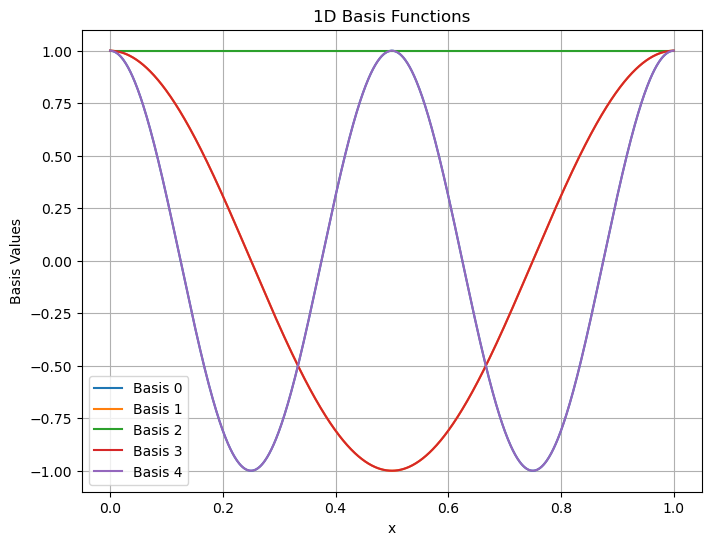

In [124]:
basis.plot_1d_basis()